<a href="https://colab.research.google.com/github/sgogoigh/ACM_Research_Iris/blob/main/ACMAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Prepare a logistic regression model and an Artificial Neural Network
# to classify features from the Iris dataset. 
# Explain in detail the various data-preprocessing techniques used, 
# performance metrics for both the models and plot graphs for the same.

In [ ]:
#Using logistic regression

#readying to import iris dataset
import csv
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#for plotting graphs
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
%matplotlib inline
import seaborn as sns
sns.set(style = "white")

#storing the dataset
iris = load_iris()
#print(iris)

#iris.keys()
# OP - dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#iris.target_names
# OP - array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#iris.feature_names
# OP - ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# There are three types of iris flowers - setosa, versicolor and virginica
# The purpose of the logistic regression model is identify which set of data
# depicts which flower

# Organising the data frame

iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
#iris_df.head()

# We now prepare the input and output data
# X - Input
# Y - Output
X = iris.data
Y = iris.target

#print(X.shape)
# Input data has 150 rows and 4 columns
#print(Y.shape)
# Target data has 150 rows

# Splitting of training data and test data is required
# For training machine learning algorithm, model.fit() is used
# After training, we predict based on the new input given
# After prediction, we compare using model.score() for accuracy

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y,test_size = 0.2, random_state = 2)

#starting with logistic regression
lorg = LogisticRegression(random_state = 0)
lorg.fit(X_train, Y_train)

# For predictions
Y_pred = lorg.predict(X_test)

# Now we use a CONFUSION MATRIX which checks the correctness or accuracy
# of our predictions

check = confusion_matrix(Y_test, Y_pred)

# TO check the accuracy, we use function accuracy_score
acc = accuracy_score(Y_test,Y_pred)
print(acc)

0.9666666666666667


Epoch 1/100
4/4 [==============================] - 1s 80ms/step - loss: 1.4001 - accuracy: 0.3250 - val_loss: 1.2945 - val_accuracy: 0.3667
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 1.3808 - accuracy: 0.3250 - val_loss: 1.2806 - val_accuracy: 0.3667
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 1.3620 - accuracy: 0.3250 - val_loss: 1.2670 - val_accuracy: 0.3667
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 1.3432 - accuracy: 0.3250 - val_loss: 1.2545 - val_accuracy: 0.3667
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 1.3275 - accuracy: 0.3250 - val_loss: 1.2430 - val_accuracy: 0.3667
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 1.3119 - accuracy: 0.3250 - val_loss: 1.2321 - val_accuracy: 0.3667
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 1.2970 - accuracy: 0.3250 - val_loss: 1.2221 - val_accuracy: 0.3667
Epoch 8/100
4/4 [===

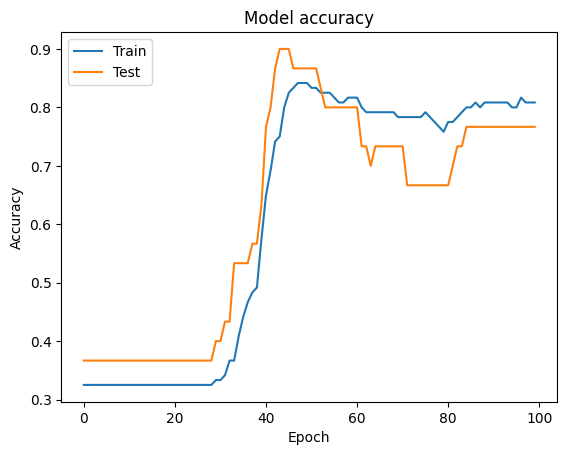

In [ ]:
# Using Artificial Neural Network
# We use TensorFlow and keras for creating and implementing Neural Networks

import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris_data = load_iris()

# Training and testing data
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2)

# Creating a sequential ANN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(4,), activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Accuracy check
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.2f}')

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
